In [1]:
#Sample Test

In [3]:
using CausalInference
using TikzGraphs
using CSV, DataFrames
# If you have problems with TikzGraphs.jl, 
# try alternatively plotting backend GraphRecipes.jl + Plots.jl
# and corresponding plotting function `plot_pc_graph_recipes`

# Generate some sample data to use with the PC algorithm

N = 1000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

(x = [-0.49484203214427314, 0.032259867840461316, 0.14914684791078395, 0.9919142824139181, -0.13771624189899828, 0.6352790101117325, -0.03163584479680936, 1.906607163858414, 1.0090038316661085, 2.2062407219917355  …  -2.237578196238955, 1.7664415437524392, -0.14231434588404618, -0.5335245199887826, -1.0620794240013853, 1.3009263766504995, 0.10457464119618624, 0.20296931446215294, -0.5858841001609069, -1.6993399397483762], v = [-0.7548950692729733, 0.07464532634123866, -0.1891999672936638, 1.2889452074092178, -0.10766495320022645, 0.39378178905414285, 0.32468690938963, 2.5011286814861946, 1.090730509290891, 2.3415229382879215  …  -2.2089439862447677, 1.3251035803716462, -0.154897968906793, -0.0881737750382085, -0.8204803350112713, 1.3614947457927191, -0.14282813208596906, 0.005366060880578033, -0.34606599398508275, -1.4469850291080188], w = [-0.4896622520725314, 0.2117854883014515, 0.40701245034954814, 0.9456585954341508, -0.1476750141623246, 1.4754574018811133, -0.1431083533822284, 2.1

In [4]:
est_g = pcalg(df, 0.01, gausscitest)

LoadError: UndefVarError: df not defined

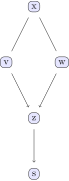

In [3]:
tp = plot_pc_graph_tikz(est_g, [String(k) for k in keys(df)])

# Student Data

In [9]:
df = CSV.read("./file12.csv")



┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(source::String) at CSV.jl:46
└ @ CSV ~/.julia/packages/CSV/UIgP3/src/CSV.jl:46


,EMPLID,ENTRY_IPEDS_FL_PT_TM,TRANSFER_STUDENT,GENDER_CD,FIRST_GENERATION_FLAG
,Int64,String,String,String,String
1,23080920,F,N,M,N
2,23107742,F,N,M,N
3,23359513,F,N,M,N
4,23397091,F,N,M,N
5,23104152,F,N,M,Y
6,23101053,F,N,M,Y
7,23133539,F,N,M,Y
8,23292408,F,N,M,N
9,23239964,F,N,F,Y


# Multivariate Logistic Regression

In [10]:
using DataFrames
using GLM
using StatsBase


# Construct the logistic regression model
model = glm(@formula(Graduated_In_4Y ~ Complexity + GENDER + Fulltime_Parttime + Pell_Recipent+First_Generation), df, Binomial(), LogitLink())

# Extract the coefficient table which also contains the p-values
print(model)



StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Graduated_In_4Y ~ 1 + Complexity + GENDER + Fulltime_Parttime + Pell_Recipent + First_Generation

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)         0.0853648   0.114433     0.75    0.4557  -0.13892      0.30965
Complexity          0.00143178  0.00020814   6.88    <1e-11   0.00102383   0.00183973
GENDER             -0.335014    0.0648193   -5.17    <1e-06  -0.462058    -0.207971
Fulltime_Parttime   0.288188    0.0668952    4.31    <1e-04   0.157076     0.419301
Pell_Recipent      -0.0396996   0.0618323   -0.64    0.5208  -0.160889   

In [11]:
using DataFrames
using GLM
using StatsBase


# Construct the logistic regression model
model = glm(@formula(Graduated_In_5Y ~ Complexity + GENDER + Fulltime_Parttime + Pell_Recipent+First_Generation), df, Binomial(), LogitLink())

# Extract the coefficient table which also contains the p-values
print(model)



StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Graduated_In_5Y ~ 1 + Complexity + GENDER + Fulltime_Parttime + Pell_Recipent + First_Generation

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)         1.46527    0.178904      8.19    <1e-15   1.11463      1.81592
Complexity          0.0018703  0.000338904   5.52    <1e-07   0.00120606   0.00253454
GENDER             -0.551158   0.112455     -4.90    <1e-06  -0.771566    -0.33075
Fulltime_Parttime   0.643938   0.0938653     6.86    <1e-11   0.459965     0.827911
Pell_Recipent      -0.474483   0.0900027    -5.27    <1e-06  -0.650885    

In [12]:
using DataFrames
using GLM
using StatsBase


# Construct the logistic regression model
model = glm(@formula(Graduated_In_6Y ~ Complexity + GENDER + Fulltime_Parttime + Pell_Recipent+First_Generation), df, Binomial(), LogitLink())

# Extract the coefficient table which also contains the p-values
print(model)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Graduated_In_6Y ~ 1 + Complexity + GENDER + Fulltime_Parttime + Pell_Recipent + First_Generation

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                          Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         2.58474      0.254801     10.14    <1e-23   2.08533       3.08414
Complexity          0.000743871  0.000472949   1.57    0.1158  -0.000183092   0.00167084
GENDER             -0.42252      0.160231     -2.64    0.0084  -0.736567     -0.108473
Fulltime_Parttime   0.82269      0.129088      6.37    <1e-09   0.569682      1.0757
Pell_Recipent      -0.679489     0.125388     -5.42   

In [13]:
#PC Algorithm on 4 years

In [14]:
using DataFrames
data = df[:,[:Complexity, :GENDER, :Fulltime_Parttime, :Graduated_In_4Y, :Pell_Recipent, :First_Generation]]



,Complexity,GENDER,Fulltime_Parttime,Graduated_In_4Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64?,Int64,Int64,Int64
1,558,1,1,0,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,0,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [15]:
using DataFrames

data = dropmissing(data)


,Complexity,GENDER,Fulltime_Parttime,Graduated_In_4Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64,Int64,Int64,Int64
1,558,1,1,0,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,0,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [16]:
for col in names(data)
    data[!, col] = convert(Vector{Float64}, data[!, col])
end


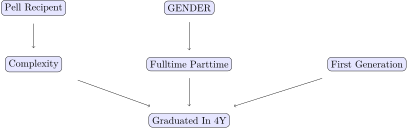

In [17]:
plot_pc_graph_tikz(pcalg(data, 0.4557, cmitest), [String(k) for k in names(data)])


In [18]:
#Changing the value

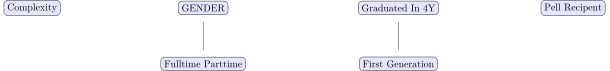

In [19]:
plot_pc_graph_tikz(pcalg(data, 0.05, cmitest), [String(k) for k in names(data)])

In [20]:
#PC algorithm on 5 year

In [21]:
using DataFrames
data1 = df[:,[:Complexity, :GENDER, :Fulltime_Parttime, :Graduated_In_5Y, :Pell_Recipent, :First_Generation]]

,Complexity,GENDER,Fulltime_Parttime,Graduated_In_5Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64?,Int64,Int64,Int64
1,558,1,1,1,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,0,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [22]:
using DataFrames

data1 = dropmissing(data1)

,Complexity,GENDER,Fulltime_Parttime,Graduated_In_5Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64,Int64,Int64,Int64
1,558,1,1,1,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,0,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [23]:
for col in names(data)
    data1[!, col] = convert(Vector{Float64}, data1[!, col])
end



LoadError: ArgumentError: column name :Graduated_In_4Y not found in the data frame; existing most similar names are: :Graduated_In_5Y

In [24]:
plot_pc_graph_tikz(pcalg(data1, 0.0000000000000001, cmitest), [String(k) for k in names(data1)])

LoadError: AssertionError: all((t->begin
            #= /Users/heileman/.julia/packages/CausalInference/AXLv8/src/pc.jl:292 =#
            t == Float64
        end), (Tables.schema(t)).types)

In [25]:
#PC algorithm on six year Grad rate

In [26]:
using DataFrames
data2 = df[:,[:Complexity, :GENDER, :Fulltime_Parttime, :Graduated_In_6Y, :Pell_Recipent, :First_Generation]]

,Complexity,GENDER,Fulltime_Parttime,Graduated_In_6Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64?,Int64,Int64,Int64
1,558,1,1,1,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,1,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [27]:
using DataFrames

data2 = dropmissing(data2)

,Complexity,GENDER,Fulltime_Parttime,Graduated_In_6Y,Pell_Recipent,First_Generation
,Int64,Int64,Int64,Int64,Int64,Int64
1,558,1,1,1,0,0
2,558,1,1,1,1,0
3,558,1,1,1,0,0
4,558,1,1,1,0,0
5,558,1,1,1,0,1
6,558,1,1,1,0,1
7,558,1,1,1,0,1
8,558,1,1,1,0,0
9,558,0,1,1,0,1


In [28]:
for col in names(data2)
    data2[!, col] = convert(Vector{Float64}, data2[!, col])
end

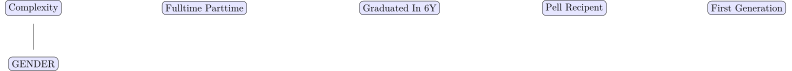

In [29]:
plot_pc_graph_tikz(pcalg(data2, 0.000000000000000000000001, cmitest), [String(k) for k in names(data2)])